# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities=[]

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "q=" + city + "&appid=" + weather_api_key
    #https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = requests.get(city_url).json()["coord"]["lat"]
        city_lng = requests.get(city_url).json()["coord"]["lon"]
        city_max_temp = requests.get(city_url).json()["main"]["temp_max"]
        city_humidity = requests.get(city_url).json()["main"]["humidity"]
        city_clouds = requests.get(city_url).json()["clouds"]["all"]
        city_wind = requests.get(city_url).json()["wind"]["speed"]
        city_country = requests.get(city_url).json()["sys"]["country"]
        city_date = requests.get(city_url).json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | qal'at bishah
City not found. Skipping...
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | ad dilam
Processing Record 6 of Set 1 | awjilah
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | margherita
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | mtambile
Processing Record 11 of Set 1 | illizi
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | zaozersk
Processing Record 16 of Set 1 | chimore
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | happy valley-goose bay
Processing Record 19 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 20 of Set 1 | mossel bay
Processing Record 21 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.97,93,91,11.00,TF,1682473249
1,qaqortoq,60.7167,-46.0333,273.76,94,96,0.22,GL,1682473250
2,tiksi,71.6872,128.8694,263.72,91,99,2.12,RU,1682473251
3,ad dilam,23.9915,47.1627,298.38,48,68,0.92,SA,1682473252
4,awjilah,29.1081,21.2869,292.94,32,0,3.34,LY,1682473253


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_data_cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.97,93,91,11.00,TF,1682473249
1,qaqortoq,60.7167,-46.0333,273.76,94,96,0.22,GL,1682473250
2,tiksi,71.6872,128.8694,263.72,91,99,2.12,RU,1682473251
3,ad dilam,23.9915,47.1627,298.38,48,68,0.92,SA,1682473252
4,awjilah,29.1081,21.2869,292.94,32,0,3.34,LY,1682473253


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

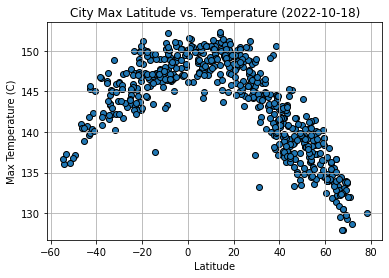

In [8]:
# Build scatter plot for latitude vs. temperature
temp_cel = []

temp_far = city_data_df["Max Temp"]

for row in range(len(temp_far)):
    temp_cel.append((temp_far[row] - 32)*(5/9))

plt.scatter(city_data_df["Lat"], temp_cel, edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

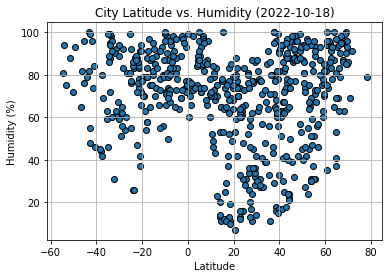

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

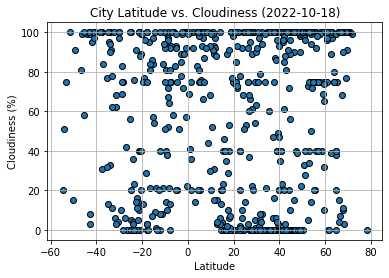

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

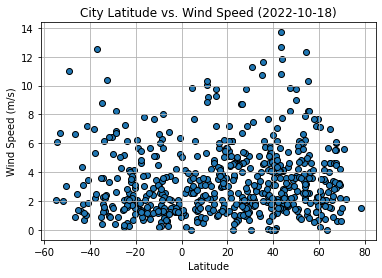

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def make_scatter_plot(x_values, y_values, x_label, y_label, title, filename):
    plt.scatter(
        x_values, 
        y_values,
        edgecolor="black", 
        linewidths=1, 
        marker="o", 
        alpha=0.8,
        label="Unused"
    )
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)

    plt.savefig(filename)

    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
pd.to_numeric(city_data_df["Lat"])

city_data_df["Max Temp (C)"] = (city_data_df["Max Temp"] -32) * 5/9

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
1,qaqortoq,60.7167,-46.0333,273.76,94,96,0.22,GL,1682473250,134.311111
2,tiksi,71.6872,128.8694,263.72,91,99,2.12,RU,1682473251,128.733333
3,ad dilam,23.9915,47.1627,298.38,48,68,0.92,SA,1682473252,147.988889
4,awjilah,29.1081,21.2869,292.94,32,0,3.34,LY,1682473253,144.966667
6,margherita,27.2833,95.6833,299.67,56,0,1.05,IN,1682473256,148.705556


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
pd.to_numeric(city_data_df["Lat"])
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.97,93,91,11.00,TF,1682473249,137.205556
5,san antonio de pale,-1.4014,5.6325,300.99,74,100,2.09,GQ,1682473255,149.438889
7,waitangi,-43.9535,-176.5597,285.27,79,99,1.34,NZ,1682473257,140.705556
8,mtambile,-5.3833,39.7000,299.76,81,93,6.82,TZ,1682473258,148.755556
11,west island,-12.1568,96.8225,300.14,78,40,7.72,CC,1682473262,148.966667


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8193179311810918


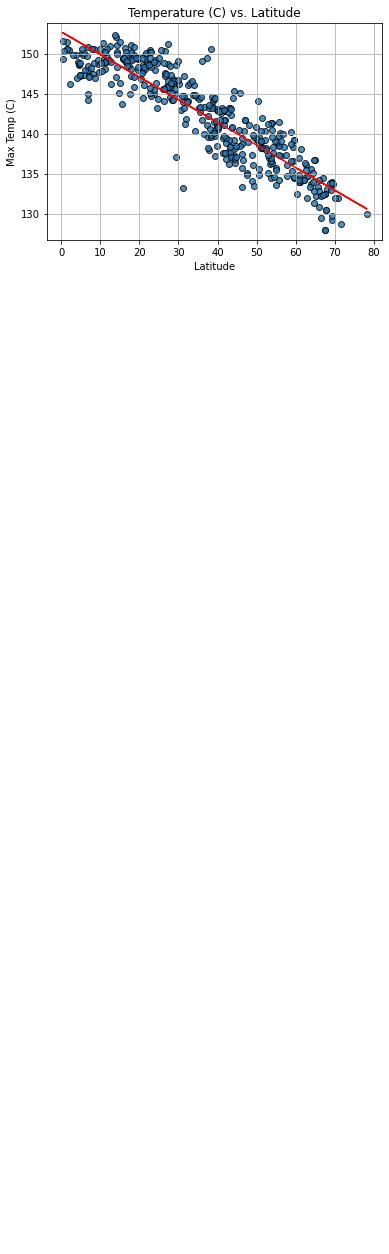

In [16]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp (C)"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(1,1),fontsize=1,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
make_scatter_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp (C)"], "Latitude", "Max Temp (C)", "Temperature (C) vs. Latitude", ".tempvlat.png")
plt.show()

The r-value is: 0.5578199362637963


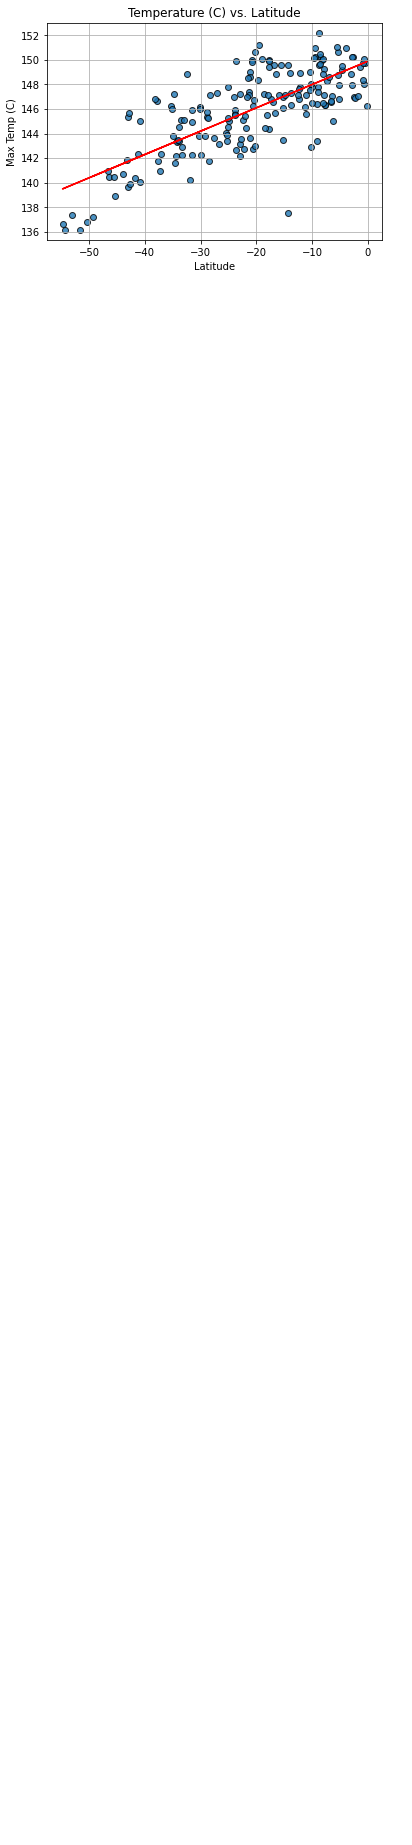

In [19]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp (C)"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5,5),fontsize=1,color="red")
print(f"The r-value is: {rvalue**2}")
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
make_scatter_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp (C)"], "Latitude", "Max Temp (C)", "Temperature (C) vs. Latitude", "./latvtemp_south_output-file.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


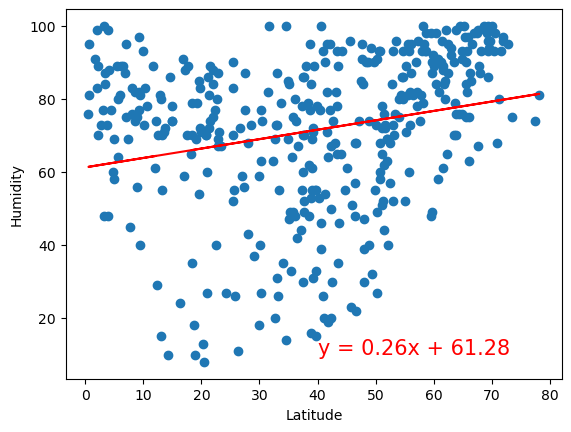

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


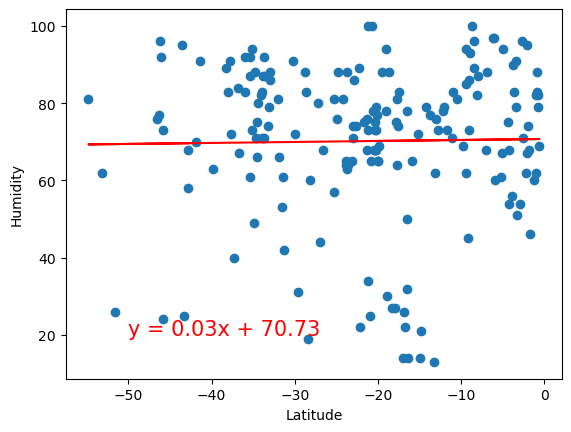

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


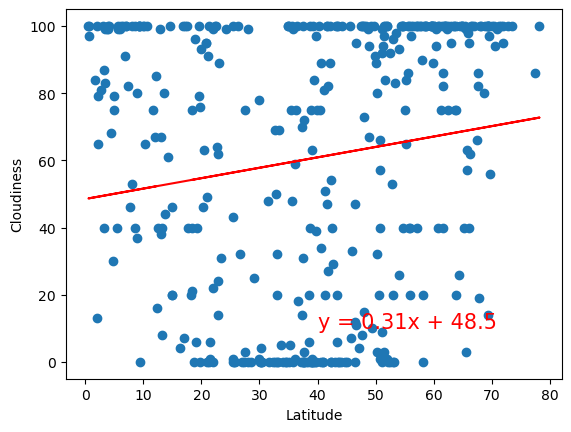

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


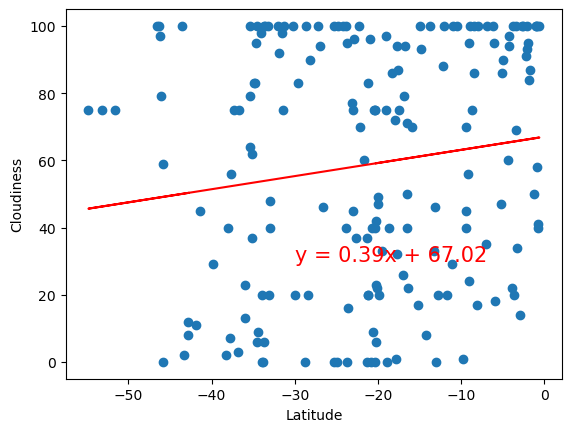

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


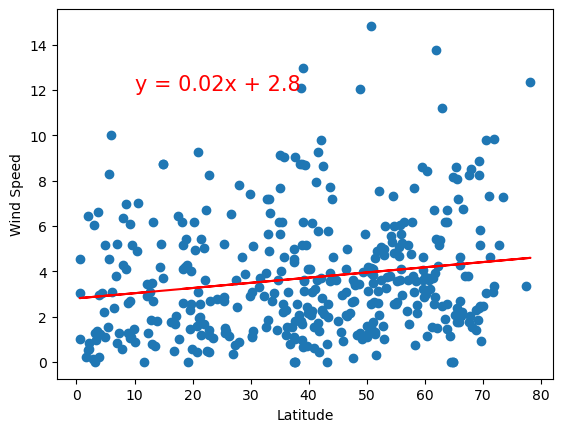

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


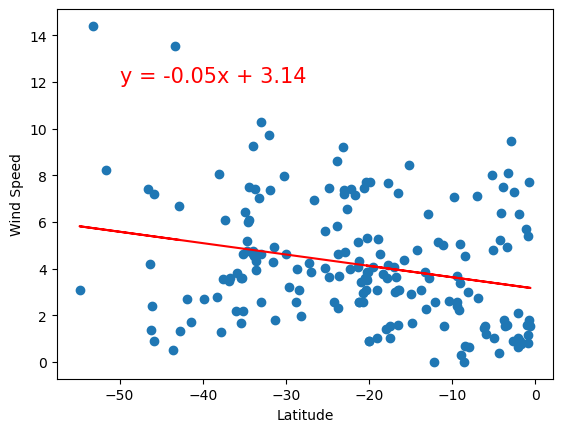

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE